In [19]:
import matplotlib.pyplot as plt
import time
import math
import pylab
import pprint

plt.rcParams['figure.figsize'] = [12, 8]

max = 100000
ten_times_max = 10 * max
log_max = max / 100
ten_over_max = float(10) / max


def is_prime(x, primes):
    for p in primes:
        if p in (2, 5):
            continue
        if p * p > x:
            return 1
        if x % p == 0:
            return 0


def check_number(x, last_digit, primes):
    candidate = x * 10 + last_digit
    if is_prime(candidate, primes) == 1:
        primes.append(candidate)
        #if len(primes) % (log_max) == 0:
        #    print(str(candidate) + "/" + str(ten_times_max) + "(" + "%.2f" % (ten_over_max * float(candidate)) + "%)")
    return


def find_primes():
    start = time.time()
    print("0/" + str(ten_times_max) + "(0%)")

    primes = [2, 3, 5, 7]
    for x in range(1, max):
        check_number(x, 1, primes)
        check_number(x, 3, primes)
        check_number(x, 7, primes)
        check_number(x, 9, primes)

    #print(str(10 * max) + "/" + str(ten_times_max) + "(100%)" + "\n")

    end = time.time()
    print("Total time: " + "%.2f" % (end - start) + "s")
    return primes;

In [17]:
result = find_primes()

print("Primes found: " + str(len(result)))
rng = range(0, len(result))
ratios = [float(x) / y for x, y in zip(rng, result)]
print("Proportion of primes: " + "%.2f" % (100 * ratios[-1]) + "%")

0/1000000(0%)
Total time: 4.32s
Primes found: 78498
Proportion of primes: 7.85%


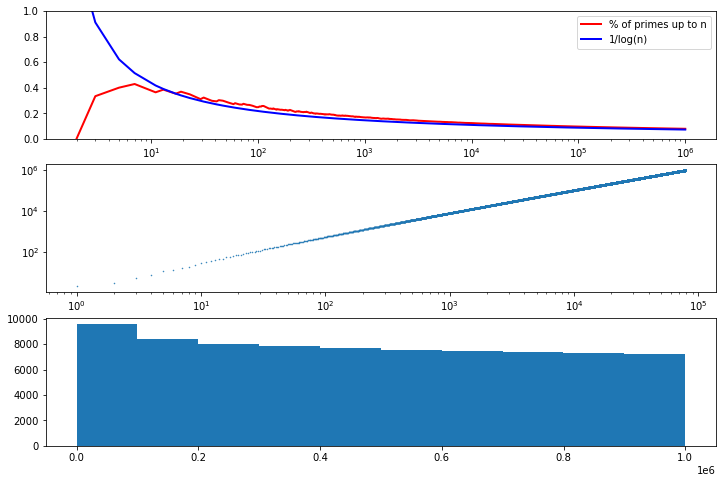

In [21]:

# plot the percentage of prime numbers as a function of n, against 1/log(n)
logs = [1.0 / math.log(x) for x in result]
plt.subplot(3, 1, 1)
plt_ratios, = plt.plot(result, ratios, lw=2, color='red', label='% of primes up to n')
plt_logs, = plt.plot(result, logs, lw=2, color='blue', label='1/log(n)')
plt.xscale('log')
plt.ylim(0.0, 1.0)
plt.legend()
plt.draw()

# plot the number of primes as function of n, in log scale
plt.subplot(3, 1, 2)
plt.xscale('log')
plt.yscale('log')
rng_1 = range(1, len(result) + 1)
plt.scatter(x=rng_1, y=result, marker=".", s=1)

# histogram of the primes found (number of them per chunk of integers)
plt.subplot(3, 1, 3)
plt.hist(result, bins=10)

plt.show()